<a href="https://colab.research.google.com/github/huvimal/Sohoavaquantrithongtinso/blob/master/Kiemtrasohoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Import thư viện
import pandas as pd
#Tạo một dictionary chứa dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                    'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                   'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}
#Tạo DataFrame từ dictionary
df = pd.DataFrame(data)

print(df)

   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales         88.0          40.0             5.0    Male   
1         E002         IT          NaN          45.0             3.0  Female   
2         E003         HR         75.0          38.0             NaN    Male   
3         E004      Sales         92.0          42.0             6.0  Female   
4         E005         IT         68.0           NaN             4.0    None   
5         E006         HR         85.0          39.0             5.0    Male   
6         E007      Sales          NaN          41.0             3.0  Female   
7         E008         IT         79.0          44.0             4.0    Male   
8         E009         HR         90.0          37.0             NaN  Female   
9         E010      Sales         73.0          40.0             5.0    Male   
10        E011         IT         86.0          46.0             2.0  Female   
11        E012         HR          NaN  

In [55]:
#1.
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


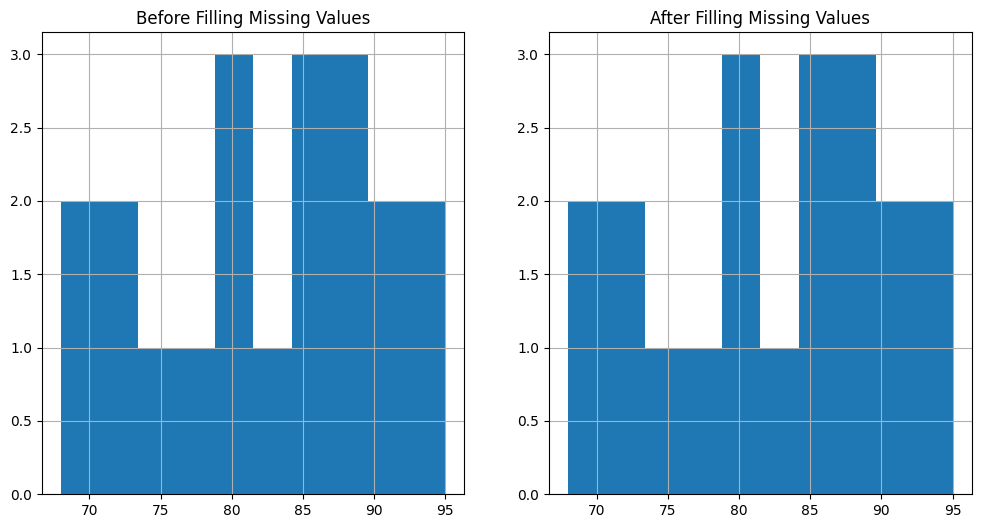

In [56]:
#2
# Điền giá trị thiếu bằng trung bình của Department
df['Performance'] = df.groupby('Department')['Performance'].transform(lambda x: x.fillna(x.mean()))

# Phương pháp khác: Dựa trên Location
for location in df['Location'].unique():
    location_mean = df[df['Location'] == location]['Performance'].mean()
    df.loc[(df['Location'] == location) & (df['Performance'].isnull()), 'Performance'] = location_mean

import matplotlib.pyplot as plt

# Vẽ histogram trước và sau
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Performance'].hist()
plt.title('Before Filling Missing Values')
plt.subplot(1, 2, 2)
df['Performance'].hist()
plt.title('After Filling Missing Values')
plt.show()

In [57]:
#3
import numpy as np
#Tính độ lệch chuẩn của số giờ làm việc
std_hours_worked = np.std(df['Hours_Worked'])
#Tính trung bình của số giờ làm việc
median_hours_worked = np.median(df['Hours_Worked'])
print(std_hours_worked, median_hours_worked)

2.8673076722244564 nan


#4
#df.groupby('Location')
#phương thức groupby() của pandas để nhóm dữ liệu trong DataFrame df theo cột Location. Mỗi nhóm sẽ tương ứng với một địa điểm làm việc khác nhau.
#.apply(lambda x: x['Hours_Worked'].corr(x['Performance']))
#Áp dụng hàm tính hệ số tương quan

In [58]:
#4
#df.groupby('Location')
#phương thức groupby() của pandas để nhóm dữ liệu trong DataFrame df theo cột Location. Mỗi nhóm sẽ tương ứng với một địa điểm làm việc khác nhau.
#.apply(lambda x: x['Hours_Worked'].corr(x['Performance']))
#Áp dụng hàm tính hệ số tương quan
correlation = df.groupby('Location').apply(lambda x: x['Hours_Worked'].corr(x['Performance']))
print(correlation)

Location
Site_A    0.409611
Site_B   -0.022476
Site_C    0.939307
dtype: float64


<ipython-input-58-8593527a841c>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation = df.groupby('Location').apply(lambda x: x['Hours_Worked'].corr(x['Performance']))


#5Vẽ boxplot của Performance theo Department và Gender:
#Sử dụng seaborn.boxplot().
#Xác định outlier: Tính IQR để tìm các giá trị ngoài phạm vi.
#Kế hoạch phỏng vấn: Tổ chức các buổi phỏng vấn để tìm hiểu nguyên nhân và cải thiện quản trị.

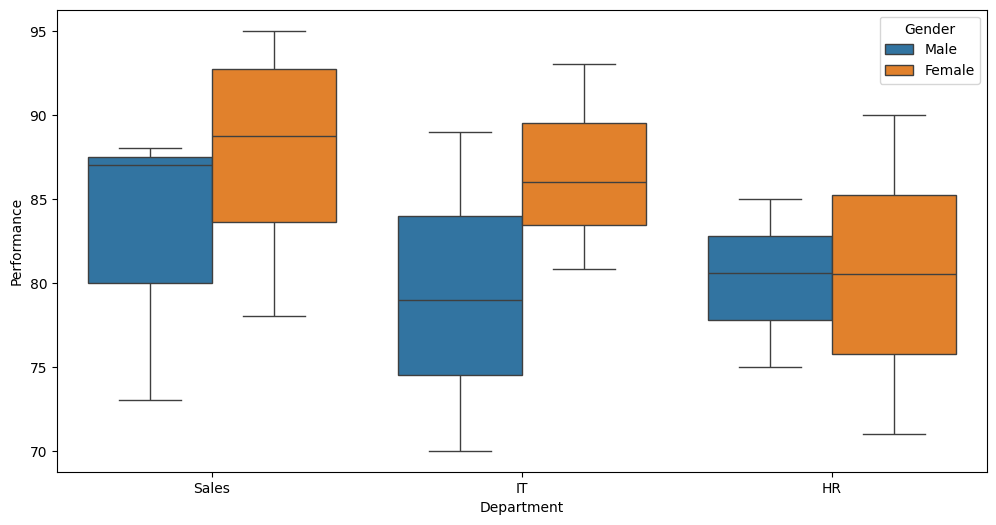

In [59]:
#5Vẽ boxplot của Performance theo Department và Gender:
#Sử dụng seaborn.boxplot().
#Xác định outlier: Tính IQR để tìm các giá trị ngoài phạm vi.
#Kế hoạch phỏng vấn: Tổ chức các buổi phỏng vấn để tìm hiểu nguyên nhân và cải thiện quản trị.
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df)
plt.show()

# Tính IQR để xác định outliers
Q1 = df['Performance'].quantile(0.25)
Q3 = df['Performance'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Performance'] < (Q1 - 1.5 * IQR)) | (df['Performance'] > (Q3 + 1.5 * IQR))]

In [60]:
#6 Tạo cột mới Efficiency:
df['Efficiency'] = df['Performance'] / df['Hours_Worked']
best_employee = df.loc[df['Efficiency'].idxmax()]
print(best_employee)

Employee_ID           E009
Department              HR
Performance           90.0
Hours_Worked          37.0
Training_Hours         NaN
Gender              Female
Location            Site_A
Efficiency        2.432432
Name: 8, dtype: object


#7Tính tỷ lệ nhân viên nữ:
#Sử dụng df['Gender'].value_counts(normalize=True) sau khi điền giá trị thiếu bằng mode.
#Chính sách đa dạng giới tính: Đề xuất các chương trình tuyển dụng nhằm tăng cường sự đa dạng.

In [61]:
#7Tính tỷ lệ nhân viên nữ:
#Sử dụng df['Gender'].value_counts(normalize=True) sau khi điền giá trị thiếu bằng mode.
#Chính sách đa dạng giới tính: Đề xuất các chương trình tuyển dụng nhằm tăng cường sự đa dạng.
female_ratio = df.groupby('Department')['Gender'].apply(lambda x: (x == 'Female').mean())
print(female_ratio)

Department
HR       0.333333
IT       0.428571
Sales    0.571429
Name: Gender, dtype: float64


#8 Vẽ scatter plot giữa Training_Hours và Performance:
#Sử dụng seaborn.scatterplot().
#Kế hoạch đào tạo: Đưa ra các khóa học cụ thể dựa trên độ phân bố của dữ liệu.

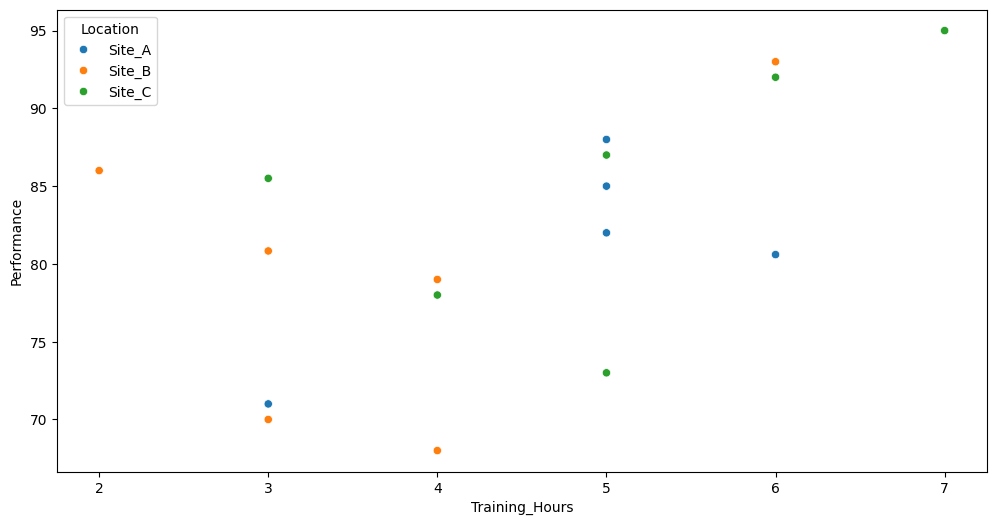

In [62]:
#8 Vẽ scatter plot giữa Training_Hours và Performance:
#Sử dụng seaborn.scatterplot().
#Kế hoạch đào tạo: Đưa ra các khóa học cụ thể dựa trên độ phân bố của dữ liệu.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df)
plt.show()


#9Tính trung bình Performance của từng Department:
#Sử dụng df.groupby('Department')['Performance'].mean().
#Chiến lược cải thiện: Đề xuất các chương trình đào tạo cho phòng ban có hiệu suất thấp.

Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64


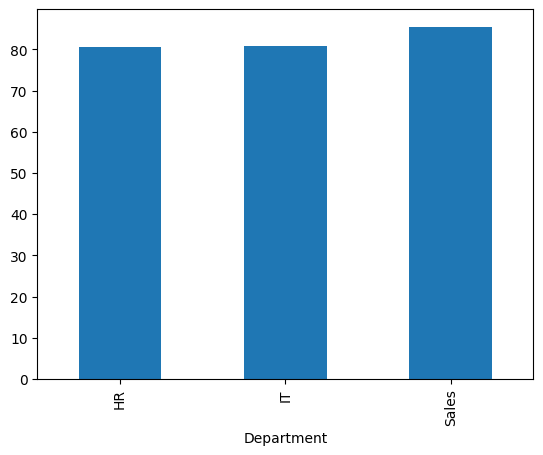

In [63]:
#9Tính trung bình Performance của từng Department:
#Sử dụng df.groupby('Department')['Performance'].mean().
#Chiến lược cải thiện: Đề xuất các chương trình đào tạo cho phòng ban có hiệu suất thấp.
mean_performance = df.groupby('Department')['Performance'].mean()
print(mean_performance)

mean_performance.plot(kind='bar')
plt.show()

#10 Nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85:
#Sử dụng df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)].
#Nghiên cứu nội bộ: Tìm hiểu về các yếu tố giúp họ làm việc hiệu quả.

In [64]:
#10 Nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85:
#Sử dụng df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)].
#Nghiên cứu nội bộ: Tìm hiểu về các yếu tố giúp họ làm việc hiệu quả.
high_performance_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
print(high_performance_employees)

  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Efficiency  
8   Site_A    2.432432  


#11 Điền giá trị thiếu bằng hồi quy tuyến tính:
#Xây dựng mô hình hồi quy tuyến tính bằng sklearn.
#So sánh với phương pháp trung bình và đề xuất một cách tiếp cận lai.

In [65]:
#11 Điền giá trị thiếu bằng hồi quy tuyến tính:
#Xây dựng mô hình hồi quy tuyến tính bằng sklearn.
#So sánh với phương pháp trung bình và đề xuất một cách tiếp cận lai.
from sklearn.linear_model import LinearRegression

# Xây dựng mô hình hồi quy
X = df[['Hours_Worked', 'Training_Hours']].fillna(0)  # Điền giá trị thiếu
y = df['Performance'].fillna(0)

model = LinearRegression().fit(X, y)
predicted_performance = model.predict(X)
df['Performance'].fillna(pd.Series(predicted_performance), inplace=True)

<ipython-input-65-6665e21799df>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Performance'].fillna(pd.Series(predicted_performance), inplace=True)


#12 Tính skewness của Performance:
#Sử dụng scipy.stats.skew(df['Performance']).
#Điều chỉnh cách tính Performance: Đề xuất các chỉ số công bằng hơn.

In [66]:
#12 Tính skewness của Performance:
#Sử dụng scipy.stats.skew(df['Performance']).
#Điều chỉnh cách tính Performance: Đề xuất các chỉ số công bằng hơn.
from scipy.stats import skew

performance_skewness = skew(df['Performance'])
print(performance_skewness)

-0.269777548857972


#13 Vẽ pairplot:
#Sử dụng seaborn.pairplot().
#Mô hình đánh giá hiệu suất: Đề xuất một mô hình mới dựa trên phân tích.

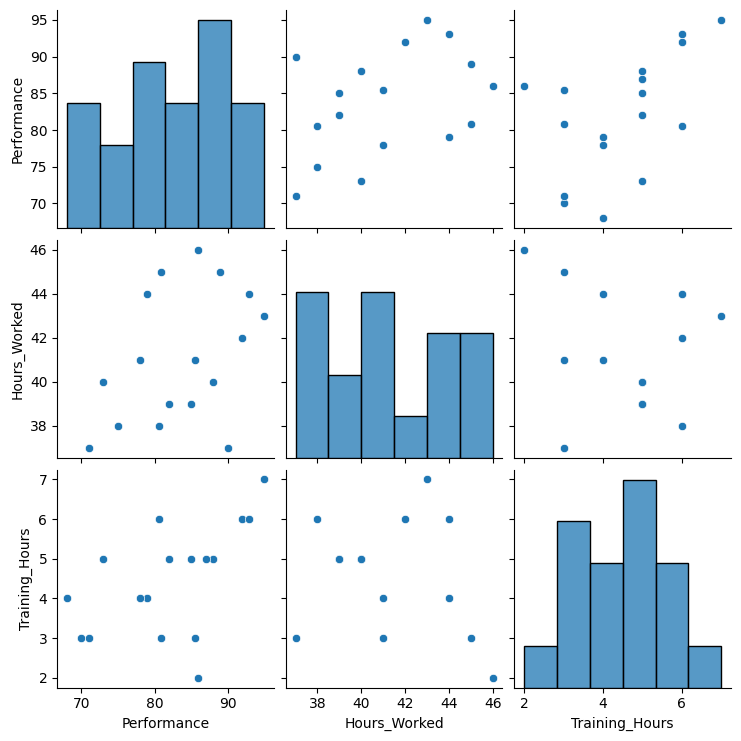

In [67]:
#13 Vẽ pairplot:
#Sử dụng seaborn.pairplot().
#Mô hình đánh giá hiệu suất: Đề xuất một mô hình mới dựa trên phân tích.
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()

# Đề xuất mô hình đánh giá mới

#14 Nhóm dữ liệu theo Location:
#Sử dụng df.groupby('Location')['Performance'].apply(lambda x: (x > 80).mean()).
#Chiến lược khen thưởng: Đề xuất kế hoạch khen thưởng linh hoạt cho từng địa điểm.

Location
Site_A    0.714286
Site_B    0.571429
Site_C    0.666667
Name: Performance, dtype: float64


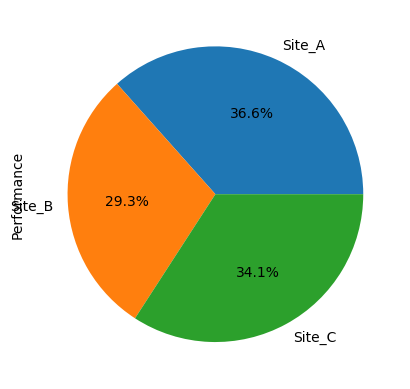

In [68]:
#14 Nhóm dữ liệu theo Location:
#Sử dụng df.groupby('Location')['Performance'].apply(lambda x: (x > 80).mean()).
#Chiến lược khen thưởng: Đề xuất kế hoạch khen thưởng linh hoạt cho từng địa điểm.
location_performance_ratio = df.groupby('Location')['Performance'].apply(lambda x: (x > 80).mean())
print(location_performance_ratio)

# Vẽ pie chart
location_performance_ratio.plot.pie(autopct='%1.1f%%')
plt.show()

In [69]:
#15 Tạo hàm xác định nhân viên có Performance ngoài 2 độ lệch chuẩn:
#Viết hàm sử dụng numpy để xác định và đánh giá lại hiệu suất.
def identify_outliers(df):
    mean = df['Performance'].mean()
    std_dev = df['Performance'].std()
    threshold_upper = mean + 2 * std_dev
    threshold_lower = mean - 2 * std_dev
    outliers = df[(df['Performance'] < threshold_lower) | (df['Performance'] > threshold_upper)]
    return outliers

outliers = identify_outliers(df)
print("Nhân viên có Performance ngoài 2 độ lệch chuẩn:")
print(outliers)

Nhân viên có Performance ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Employee_ID, Department, Performance, Hours_Worked, Training_Hours, Gender, Location, Efficiency]
Index: []


#16Tải dữ liệu MNIST và chuẩn hóa:
#Sử dụng torchvision.datasets.MNIST.
#Đề xuất trực quan hóa khác: Sử dụng biểu đồ thống kê để hiểu rõ hơn về phân bố các số.

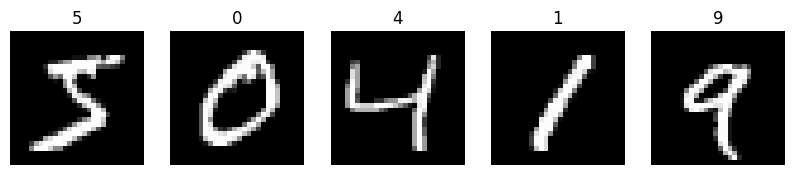

In [75]:
#16Tải dữ liệu MNIST và chuẩn hóa:
#Sử dụng torchvision.datasets.MNIST.
#Đề xuất trực quan hóa khác: Sử dụng biểu đồ thống kê để hiểu rõ hơn về phân bố các số.
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Tải dữ liệu MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten thành vector 784 chiều
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# In 5 ảnh mẫu kèm nhãn
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(train_dataset[i][0].view(28, 28), cmap='gray')
    axes[i].set_title(train_dataset.targets[i].item())  # Sửa ở đây
    axes[i].axis('off')
plt.show()



# Đề xuất chiến lược chọn batch size khác
# Chiến lược: Tăng batch size lên 128 hoặc 256
# Ưu điểm: Tăng tốc độ huấn luyện nhờ vào tính chất song song trong tính toán.
# Nhược điểm: Có thể làm giảm độ chính xác của mô hình do ít cập nhật hơn.

In [76]:
#17
from torch.utils.data import DataLoader, random_split

# Chia tập train thành 80% train và 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Tạo DataLoader
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

# Đề xuất chiến lược chọn batch size khác
# Chiến lược: Tăng batch size lên 128 hoặc 256
# Ưu điểm: Tăng tốc độ huấn luyện nhờ vào tính chất song song trong tính toán.
# Nhược điểm: Có thể làm giảm độ chính xác của mô hình do ít cập nhật hơn.

Epoch 1, Train Loss: 0.4562072950893882, Test Loss: 0.2410620667609819
Epoch 2, Train Loss: 0.20654906028274025, Test Loss: 0.16903747179675965
Epoch 3, Train Loss: 0.153038987905772, Test Loss: 0.14430011761861194
Epoch 4, Train Loss: 0.12560730464935208, Test Loss: 0.1300185690989872
Epoch 5, Train Loss: 0.10692549943536726, Test Loss: 0.11303078477896726
Epoch 6, Train Loss: 0.09213070396476908, Test Loss: 0.11636037147339956
Epoch 7, Train Loss: 0.08117928939994608, Test Loss: 0.1043229439176447
Epoch 8, Train Loss: 0.0747434964828215, Test Loss: 0.09446449304269448
Epoch 9, Train Loss: 0.06746007479366853, Test Loss: 0.09563801511078031
Epoch 10, Train Loss: 0.06300586786829551, Test Loss: 0.1131936062732044
Epoch 11, Train Loss: 0.05723272855612022, Test Loss: 0.10867108831331905
Epoch 12, Train Loss: 0.05404456337426863, Test Loss: 0.10287794599701261
Epoch 13, Train Loss: 0.0476857951333645, Test Loss: 0.10525039080217122
Early stopping


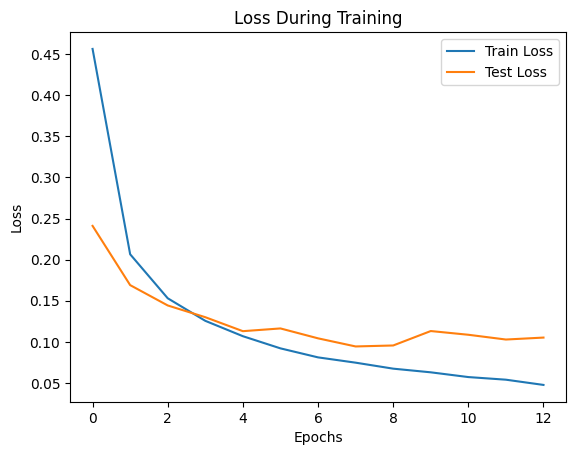

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Định nghĩa kiến trúc ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Khởi tạo mô hình, loss, optimizer
model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình với Early Stopping
patience = 5
best_loss = float('inf')
counter = 0
train_losses, test_losses = [], []

for epoch in range(20):
    model.train()
    epoch_loss = 0

    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Kiểm tra trên tập test
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()

    test_losses.append(test_loss / len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_loss / len(test_loader)}')

    # Early Stopping
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()

In [96]:
#19
# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = outputs.view(32, 10)  # Hoặc kích thước phù hợp
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, conf_matrix

# Evaluate the model
accuracy, conf_matrix = evaluate_model(model, test_loader)

# Analyze misclassifications
if accuracy < 0.95:
    print("Accuracy is below 95%. Analyzing misclassifications...")
    # Identify the most confused digits
    max_confusions = np.unravel_index(np.argmax(conf_matrix, axis=None), conf_matrix.shape)
    print(f"Most confused digits: True label {max_confusions[0]}, Predicted label {max_confusions[1]}")

    # Suggest improvements
    print("Suggestions for improvement:")
    print("1. Data Augmentation: Apply transformations like rotation, scaling, and translation to the training data.")
    print("2. Feature Engineering: Extract more features from the images, such as edge detection or texture features.")
    print("3. Model Complexity: Experiment with deeper or wider architectures, or use different activation functions.")
    print("4. Ensemble Methods: Combine predictions from multiple models to improve robustness.")

# Phân tích các chữ số bị nhầm lẫn
# Nếu accuracy dưới 95%, phân tích confusion matrix và đề xuất cải thiện.
# Ví dụ: Sử dụng kỹ thuật data augmentation để tăng cường tập dữ liệu, hoặc điều chỉnh hyperparameters.

UnboundLocalError: cannot access local variable 'outputs' where it is not associated with a value